# Homework 2

**Start date:** *29th January 2018*

**Due date:** *11th February 2018, 11:55 pm*


## How to Submit

When you have completed the exercises and everything has finsihed running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_hw2.ipynb** before the deadline above.

Also send a **sharable link** to the notebook at the following email: ucl.coursework.submit@gmail.com. You can also make it sharable via link to everyone, up to you.

### IMPORTANT
Please make sure you submission includes **all results/plots/tables** required for grading. We will not re-run your code.

## The Data

### Handwritten Digit Recognition Dataset (MNIST)

In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below). But note that this will be the only usage of TensorFlow in this assignment.

## The Assignment

### Objectives

This assignment will be mirroring the first assignment (DL_hw1), but this time you are **not allowed to use any of the Tensorflow functionality for specifing nor optimizing** your neural network models. 
You will now use your **own implementations** of different neural network models (labelled Model 1-4, and described in the corresponding sections of the Colab).

As before, you will train these models to classify hand written digits from the Mnist dataset. 

Keep in mind, the purpose of this exercise is to implement and optimize your own neural networks
architectures without the toolbox/library tailored to do so. This also means, in order to train and evaluate your models, you will need to implement your own optimization procedure. You are to use the same cross-entropy loss as before and your own implementation of SGD.

#### Additional instruction:

**Do not use any other libraries than the ones provided in the imports cell.** You should be able to do everything via *numpy* (especially for the convolutional layer, rely on the in-built matrix/tensor multiplication that numpy offers).  

There are a few questions at the end of the colab. **Before doing any coding, please take look at Question 1** -- this should help you with the implementations, especially the optimization part.


### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.


### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function. Sum over the batch.


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 

each time evaluate the accuracy of the model both on 20% of the **train** set and on the entire **test** set.

### Reporting

For each model i, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the and utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       (num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       (num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       (num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]


### Hint: 

Remind yourselves of the chain rule and read through the lecture notes on back-propagation (computing 
the gradients by recursively applying the chain rule). This is a general procedure that applies to all model
architectures you will have to code in the following steps. Thus, you are strongly encourage to implement an
optimization procedure that generalizes and can be re-used to train all your models. Recall the only things
that you will need for each layer are: 

(i) the gradients of layer with respect to its input

(ii) the gradients with respect to its parameters, if any.

(See Question 1).


Also from the previous assignment, you should have a good idea of what to expect, both terms of behavior and relative performance. (To keep everything comparable, we kept all the hyperparameters and reporting the same).

# Imports and utility functions (do not modify!)

In [0]:
# Import useful libraries.
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

# Global variables.
log_period_samples = 20000
batch_size = 100

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10])
  return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
  # Generate figure.
  fig, axes = plt.subplots(3, 4, figsize=(22,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  # Plot all learning curves.
  for i, results in enumerate(experiment_data):
    #for j, (setting, train_accuracy, test_accuracy) in enumerate(experiment_data):
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      # Plot.
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      # Prettify individual plots.
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Task {}'.format(i + 1))
      axes[j, i].legend()
  # Prettify overall figure.
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()

# Generate summary table of results.
def plot_summary_table(experiment_data):
  # Fill Data.
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('Model {}'.format(i + 1))
    cell_text.append([])
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      cell_text[i].append(test_accuracy[-1])
  # Generate Table.
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  # Prettify.
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

In [0]:
'''class NeuralNetwork:
  
  #shape: a list which define the # of nodes in each layer
  def __init__(self, shape): 
    
    self.layers = len(shape)
    self.size = shape
    
  def xavier_init(n1,n2,const=1):
    low = -const*np.sqrt(6.0/(n1+n2))
    high = const*np.sqrt(6.0/(n1+n2))
    return np.random.rand(n1,n2)*(high-low)+low
    
  def linearLayer(x,w,b):
    return np.dot(x,w)+b
  
  
  
  def fprop():
    pass
  
  def bprop():
    pass
  
  def SGD():
    pass
  
  def reluLayer(x,w,b):
    z = np.dot(x,w)+b
    return np.maximum(z,0)
  
  def drelu():
    pass
  
  def softmax():
    pass
  
 '''   

# Model 1 (10 pts)

### Model

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=5, *learning_rate*=0.1

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task1 = []
settings = [(5, 0.0001), (5, 0.005), (5, 0.1)]

In [0]:
print('Training Model 1')

def fprop(x,y_,w,b):
  z = np.dot(x,w)+b # y: [none,10]
  z = z-np.max(z,axis=1,keepdims=1)
  y = np.exp(z)/np.sum(np.exp(z), axis=1,keepdims=1)
  loss = np.sum(y_*(np.log(y)))
  return y,loss
    
def bprop(x,y_,y):
  dz = y-y_ #dz: [n,10]
  dw = np.dot(x.T,dz)   #[784,n][n,10]--dw:[784,10] 
  db = np.sum(dz,axis=0,keepdims=True)
  return dw, db

def xavier_init(n1,n2,const=1):
  low = -const*np.sqrt(6.0/(n1+n2))
  high = const*np.sqrt(6.0/(n1+n2))
  return np.random.rand(n1,n2)*(high-low)+low
  
def accuracy(y,y_):
  acc = np.sum(y.argmax(axis=1)==y_.argmax(axis=1))/float(y.shape[0])
  return acc

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:

  # Reset graph, recreate placeholders and dataset.
  mnist = get_data()
  eval_mnist = get_data()

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  ###~~~~~~~~~~~~~
  
  W = xavier_init(784,10)
  b = xavier_init(1,10)
  train_setlen = int(len(mnist.train.images)*0.2)
  
  ####################################################

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  while mnist.train.epochs_completed < num_epochs:

    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)

    #################
    # Training step #
    #################
    y,loss = fprop(batch_xs,batch_ys,W,b)
    dw,db = bprop(batch_xs,batch_ys,y)
    W = W-learning_rate*dw
    b = b-learning_rate*db
    #print(str(loss))

    # Periodically evaluate.
    if i % log_period_updates == 0:

      #####################################
      # Compute and store train accuracy. #
      #####################################
      x_train = mnist.train.images[0:train_setlen,:]
      y_train = mnist.train.labels[0:train_setlen,:]
      ytrain,loss_train = fprop(x_train,y_train,W,b)
      train_acc = accuracy(ytrain,y_train)
      train_accuracy.append(train_acc)

      #####################################
      # Compute and store test accuracy.  #
      #####################################
      x_eval = eval_mnist.test.images
      y_eval = eval_mnist.test.labels
      yeval,loss_eval = fprop(x_eval,y_eval,W,b)
      test_acc = accuracy(yeval,y_eval)
      test_accuracy.append(test_acc)

  experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 1
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MN

# Model 2 (15 pts)

1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]

In [0]:
print('Training Model 2')

def fprop_bprop(x,y_,w1,b1,w2,b2):
  z1 = np.dot(x,w1)+b1 # x:[ndata,784] w1:[784,32]--z1:[ndata,32]
  g1 = np.maximum(z1,0) #relu
  z2 = np.dot(g1,w2)+b2 #g1:[ndata,32] w2:[32,10]--z2:[ndata,10]
  z2 = z2-np.max(z2,axis=1,keepdims=1)
  y = np.exp(z2)/np.sum(np.exp(z2), axis=1,keepdims=1) #--g2
  
  
  dz2 = y-y_ #dz2: [n,10] dL/dz2
  #dg1 = np.dot(dz2,w2.T)
  dw2 = np.dot(g1.T,dz2)   #[32,n][n,10]--dw2:[32,10] dL/dg1 = dL/dz2*dz2/dg1
  db2 = np.sum(dz2,axis=0,keepdims=1)
  dz2_dg1 = relu_gradient(z1)   #dL/dz1 = dL/dz2*dz2/dg1*dg1/dz1 dg2: [ndata,32]
  dz1 = np.dot(dz2,w2.T)*dz2_dg1 #dz2:[n,10], w2.T:[10,32] --dz1:[ndata,32]
  dw1 = np.dot(x.T,dz1) #dz1: [ndata,32], x.T:[784,ndata]--dw1:[784,32]
  db1 = np.sum(dz1,axis=0,keepdims=1)
  return y, dw2, db2,dw1, db1

def xavier_init(n1,n2,const=1):
  low = -const*np.sqrt(6.0/(n1+n2))
  high = const*np.sqrt(6.0/(n1+n2))
  return np.random.rand(n1,n2)*(high-low)+low
  
def accuracy(y,y_):
  acc = np.sum(y.argmax(axis=1)==y_.argmax(axis=1))/float(y.shape[0])
  return acc


def relu_gradient(z):
    g=1*(z>0)
    return g



# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  print('Training Model 2 num_epochs:'+str(num_epochs)+'learning_rate:'+str(learning_rate))
  
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  W1 = xavier_init(784,32)
  b1 = xavier_init(1,32)
  W2 = xavier_init(32,10)
  b2 = xavier_init(1,10)
  train_setlen = int(len(mnist.train.images)*0.2)
  

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  while mnist.train.epochs_completed < num_epochs:

    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)

    #################
    # Training step #
    #################
    y, dw2, db2,dw1, db1 = fprop_bprop(batch_xs,batch_ys,W1,b1,W2,b2)
    W1 -= learning_rate*dw1
    b1 -= learning_rate*db1
    W2 -= learning_rate*dw2
    b2 -= learning_rate*db2

    # Periodically evaluate.
    if i % log_period_updates == 0:

      #####################################
      # Compute and store train accuracy. #
      #####################################
      x_train = mnist.train.images[0:train_setlen,:]
      y_train = mnist.train.labels[0:train_setlen,:]
      ytrain,_1,_2,_3,_4 = fprop_bprop(x_train,y_train,W1,b1,W2,b2)
      train_acc = accuracy(ytrain,y_train)
      train_accuracy.append(train_acc)



      #####################################
      # Compute and store test accuracy.  #
      #####################################
      x_eval = eval_mnist.test.images
      y_eval = eval_mnist.test.labels
      yeval,_1,_2,_3,_4 = fprop_bprop(x_eval,y_eval,W1,b1,W2,b2)
      test_acc = accuracy(yeval,y_eval)
      test_accuracy.append(test_acc)
  
  experiments_task2.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2
Training Model 2 num_epochs:15learning_rate:0.0001
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Training Model 2 num_epochs:15learning_rate:0.005
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Training Model 2 num_epochs:15learning_rate:0.1
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extractin

In [0]:
#plot_learning_curves(experiments_task2)



# Model 3 (15 pts)

2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.05

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task3 = []
settings = [(5, 0.003), (40, 0.003), (40, 0.05)]

In [0]:
print('Training Model 3')

def fprop_bprop(x,y_,w1,b1,w2,b2,w3,b3):
  z1 = np.dot(x,w1)+b1 # x:[ndata,784] w1:[784,32]--z1:[ndata,32]
  g1 = relu(z1) #relu
  z2 = np.dot(g1,w2)+b2 #g1:[ndata,32] w2:[32,32]--z2:[ndata,32]
  g2 = relu(z2)
  z3 = np.dot(g2,w3)+b3 #w3:[32,10]--z3:[ndata,10]
  z3 = z3-np.max(z3,axis=1,keepdims=1)
  y = np.exp(z3)/np.sum(np.exp(z3), axis=1,keepdims=1) #--g3
  loss = y_*(-y+np.log(np.sum(np.exp(y), axis=1,keepdims=1)))
  #loss = np.sum(y_*np.log(y))
  
  dz3 = y-y_ #dz3: [n,10] dL/dz3
  dw3 = np.dot(g2.T,dz3) #[ndata,32].T * [ndata,10]--dw3:[32,10]
  db3 = np.sum(dz3,axis=0,keepdims=1)
  dz2 = np.dot(dz3,w3.T)*relu_gradient(z2) #[n,10]*[32,10].T--dz3:[n,32]
  dw2 = np.dot(g1.T,dz2)   #[32,n][n,32]--dw2:[32,32] dL/dg1 = dL/dz2*dz2/dg1
  db2 = np.sum(dz2,axis=0,keepdims=1)
      #dL/dz1 = dL/dz2*dz2/dg1*dg1/dz1 dg2: [ndata,32]
  dz1 = np.dot(dz2,w2.T)*relu_gradient(z1) #dz2:[n,32], w2.T:[32,32] --dz1:[ndata,32]
  dw1 = np.dot(x.T,dz1) #dz1: [ndata,32], x.T:[784,ndata]--dw1:[784,32]
  db1 = np.sum(dz1,axis=0,keepdims=1)
  return y, dw3, db3,dw2, db2,dw1, db1

def relu(z):
  return np.maximum(z,0)

def xavier_init(n1,n2,const=1):
  low = -const*np.sqrt(6.0/(n1+n2))
  high = const*np.sqrt(6.0/(n1+n2))
  return np.random.rand(n1,n2)*(high-low)+low
  
def accuracy(y,y_):
  acc = np.sum(y.argmax(axis=1)==y_.argmax(axis=1))/float(y.shape[0])
  return acc


def relu_gradient(z):
    g=1*(z>0)
    return g



# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  W1 = xavier_init(784,32)
  b1 = xavier_init(1,32)
  W2 = xavier_init(32,32)
  b2 = xavier_init(1,32)
  W3 = xavier_init(32,10)
  b3 = xavier_init(1,10)
  train_setlen = int(len(mnist.train.images)*0.2)

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  while mnist.train.epochs_completed < num_epochs:

    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)

    #################
    # Training step #
    #################
    y, dw3, db3,dw2, db2,dw1, db1 = fprop_bprop(batch_xs,batch_ys,W1,b1,W2,b2,W3,b3)
    W1 -= learning_rate*dw1
    b1 -= learning_rate*db1
    W2 -= learning_rate*dw2
    b2 -= learning_rate*db2
    W3 -= learning_rate*dw3
    b3 -= learning_rate*db3

    # Periodically evaluate.
    if i % log_period_updates == 0:

      #####################################
      # Compute and store train accuracy. #
      #####################################
      x_train = mnist.train.images[0:train_setlen,:]
      y_train = mnist.train.labels[0:train_setlen,:]
      ytrain,_1,_2,_3,_4,_5,_6 = fprop_bprop(x_train,y_train,W1,b1,W2,b2,W3,b3)
      train_acc = accuracy(ytrain,y_train)
      train_accuracy.append(train_acc)

      #####################################
      # Compute and store test accuracy.  #
      #####################################
      x_eval = eval_mnist.test.images
      y_eval = eval_mnist.test.labels
      yeval,_1,_2,_3,_4,_5,_6 = fprop_bprop(x_eval,y_eval,W1,b1,W2,b2,W3,b3)
      test_acc = accuracy(yeval,y_eval)
      test_accuracy.append(test_acc)

  experiments_task3.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MN

In [0]:
#plot_learning_curves(experiments_task3)

# Model 4 (20 pts)

### Model
3 layer convolutional model (2 convolutional layers followed by max pooling) + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- Employ plain convolution (no stride) and for max pooling operations use 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- num_epochs=5, learning_rate=0.01

- num_epochs=10, learning_rate=0.001

- num_epochs=20, learning_rate=0.001 


In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task4 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

In [0]:
'''###Forward propogation

#def relu(z):
# return np.maximum(z,0)
  

conv1:
w_conv1:[3,3,1,8]
b_conv1: [1,8]
h_conv1:[n,28,28,8]--[img_num,img_h,img_w,channel]
z1 = relu(h_conv1)
a1 = maxpool1(z1) :[n,14,14,8]--[img_num,img_h,img_w,channel]

conv2:
w_conv2:[3,3,8,8]
b_conv2: [1,8]
h_conv2:[n,14,14,8]--[img_num,img_h,img_w,channel]
z2 = relu(h_conv2)
a2 = maxpool1(z2) :[n,7,7,8]--[img_num,img_h,img_w,channel]

flatten:
z_flatten:[n,7*7*8]

nonlinear:
w_nonlinear: [7*7*8,32]
b_nonlinear:32
a_nonlinear = relu(z_flatten*w_nonlinear+b_nonlinear)--[n,32]

fullcon:[32-10]
w_fc: [32,10]
b_fc:[10]
a_fc = a_nonlinear*w_fc+b_fc --[n,10]

'''

'###Forward propogation\n\n#def relu(z):\n# return np.maximum(z,0)\n  \n\nconv1:\nw_conv1:[3,3,1,8]\nb_conv1: [1,8]\nh_conv1:[n,28,28,8]--[img_num,img_h,img_w,channel]\nz1 = relu(h_conv1)\na1 = maxpool1(z1) :[n,14,14,8]--[img_num,img_h,img_w,channel]\n\nconv2:\nw_conv2:[3,3,8,8]\nb_conv2: [1,8]\nh_conv2:[n,14,14,8]--[img_num,img_h,img_w,channel]\nz2 = relu(h_conv2)\na2 = maxpool1(z2) :[n,7,7,8]--[img_num,img_h,img_w,channel]\n\nflatten:\nz_flatten:[n,7*7*8]\n\nnonlinear:\nw_nonlinear: [7*7*8,32]\nb_nonlinear:32\na_nonlinear = relu(z_flatten*w_nonlinear+b_nonlinear)--[n,32]\n\nfullcon:[32-10]\nw_fc: [32,10]\nb_fc:[10]\na_fc = a_nonlinear*w_fc+b_fc --[n,10]\n\n'

In [0]:
class convnn(object):
  
  def __init__(self):    
 
    self.w1 = self.init_w(3,3,1,8)
    self.b1 = self.init_b(8)
  
    self.w2 = self.init_w(3,3,8,8)
    self.b2 = self.init_b(8)
  
  
    self.w3 = self.init_w(7*7*8,32)
    self.b3 = self.init_b(32)
   
    self.w4 = self.init_w(32,10)
    self.b4 = self.init_b(10)
    self.accuracy = []
    
  def fprop(self,inputs):
    output_a = []
    output_z = []
    p = []
    ##forward prop
    #batch_xs.shape [100,784]
    x_img = self.flat2D(inputs)
    output_a.append(x_img)
    #x_img.shape [100,28,28,1]

    #conv1  
    #x_conv1 = conv2(x_img,w1,b1)
    #x_mp1:output of 1 maxpooling layer
    #x_conv1:output of 1 conv layer
    #p_conv1:position info
    x_mp1,x_conv1,p_conv1 = self.maxpooling(x_img,self.w1,self.b1)
    output_a.append(x_mp1)
    output_z.append(x_conv1)
    p.append(p_conv1)

    #conv2 
    x_mp2,x_conv2,p_conv2 = self.maxpooling(x_mp1,self.w2,self.b2) 
    output_a.append(x_mp2)
    output_z.append(x_conv2)
    p.append(p_conv2)

    #flatten
    x_ft = self.flatten(x_mp2) #(100, 7*7*8)
    output_a.append(x_ft)

    #nonlinear layer
    x_nl,z_nl = self.nonlinear(x_ft,self.w3,self.b3) #x_nl,z_nl [100,32]
    output_a.append(x_nl)
    output_z.append(z_nl)

    #fullconnect 
    y, z_fc = self.fullconnect(x_nl,self.w4,self.b4) #y,z_fc [100,10]
    output_a.append(y)
    output_z.append(z_fc)
    return output_a,output_z,p
    
  def bprop(self,x,y_):
    ##backprop
    out_a,out_z,pos = self.fprop(x)
    #d fullconnect
    y = out_a[-1]
    x_nl = out_a[-2]
    dl_fc,dw4,db4 = self.dfc(x_nl,y,y_)

    #d nonlinear dl_nl[100,32]
    x_ft = out_a[-3]
    z_nl = out_z[-2] 
    dl_nl,dw3,db3 = self.dnonlinear(x_ft,self.w4,z_nl,dl_fc)

    #dflat
    dl_ft = self.dflat(dl_nl,self.w3)

    #dmaxpooling and conv
    x_mp1 = out_a[1]
    p_conv2 = pos[-1]
    dmp2 = self.dmaxpooling(dl_ft,p_conv2)
    dl_conv2,dw2,db2 = self.dconv(x_mp1,self.w2,dmp2) 

    x_img = out_a[0]
    p_conv1 = pos[0]
    dmp1 = self.dmaxpooling(dl_conv2,p_conv1)
    dl_conv1,dw1,db1 = self.dconv(x_img,self.w1,dmp1)
    
    return dw1,db1,dw2,db2,dw3,db3,dw4,db4
  
  def updatepara(self,x,y_,rate):
    dw1,db1,dw2,db2,dw3,db3,dw4,db4 = self.bprop(x,y_)
    self.w1 = self.w1 - rate*dw1
    self.b1 = self.b1 - rate*db1
    self.w2 = self.w2 - rate*dw2
    self.b2 = self.b2 - rate*db2
    self.w3 = self.w3 - rate*dw3
    self.b3 = self.b3 - rate*db3
    self.w4 = self.w4 - rate*dw4
    self.b4 = self.b4 - rate*db4
        
  
  def init_w(self,*shape):   
    w = 0.1*np.random.randn(*shape)
    return w

  def init_b(self,*shape):
    b = np.random.rand(*shape)
    return b 
  
  def flat2D(self,x): #img_num: batch_size
    return np.reshape(x, [x.shape[0], 28, 28, 1])
  
  def conv2(self,x_image,W,b,strides=[1, 1, 1, 1]):  
    #x_image: input
    #w [w_height,w_weight,channel,w_depth]:[3,3,1,8] 
    #--channel:# of nodes in previous layer,depth:# of nodes in next layer
  
    w_height,w_weight,w_channel,w_depth = W.shape
 
    padding = (w_height-1)/2
    #img:[img_num, 28, 28, channel])
    img_num,img_height,img_weight,img_channel = x_image.shape
    #img_channel:# of nodes in input layer
  
    #x after padding 
    x_img = np.zeros([img_num,img_height+padding*2,img_weight+padding*2,img_channel]) 
    x_img[:,padding:img_height+padding,padding:img_weight+padding,:] = x_image
  
    z = np.zeros([img_num,img_height,img_weight,w_depth])
  
    for i in range(img_height):
      for j in range(img_weight):
        for d in range(w_depth):
          
          w = W[:,:,:,d] #w:3,3,1/8
          x = x_img[:,i:i+w_height,j:j+w_weight,:] #[?,3,3,1/8] 
          z[:,i,j,d] = np.sum(w*x,axis =(1,2,3))+b[d] #z[?,3,3,8]--[?,]
        
    return z #z[img_num,img_h,img_w,w_depth]

      
    
  def maxpooling(self,x_image,W,b):
    #z[nodes_num/w_depth,img_num,img_h,img_w]
    z = self.conv2(x_image,W,b)  
    a = np.zeros([z.shape[0],z.shape[1]/2,z.shape[2]/2,z.shape[3]])
    position = np.zeros(z.shape) #store the position of max
  
    for i in range(x_image.shape[1]/2):
      for j in range(x_image.shape[2]/2): 
        #np.max(tx1,axis=(1,2),keepdims=1)
        a[:,i,j,:] = np.max(z[:,i*2:i*2+2,j*2:j*2+2,:],axis=(1,2)) #n,1,1,8
        position[:,i*2:i*2+2,j*2:j*2+2,:] = 1.0*(z[:,i*2:i*2+2,j*2:j*2+2,:]==np.reshape(a[:,i,j,:],(z.shape[0],1,1,z.shape[3])))
        
    return a,z,position
      

  #x:[img_num,7,7,8]
  def flatten(self,x):
    img_num = x.shape[0]
    img_flatten = np.reshape(x,[img_num,7*7*8])  
    return img_flatten
  

  #x:[img_num,7*7*8]
  #w:[7*7*8,32]
  def nonlinear(self,x,w,b):
    z = np.dot(x,w)+b #--z3
    a = relu(z)  #--a3
    return a,z

  #x:[img_num,32]
  #w:[32,10]
  def fullconnect(self,x,w,b):
    z = np.dot(x,w)+b #[img_num,10] #--z4
    z = z-np.max(z,axis=1,keepdims=1)
    y = np.exp(z)/np.sum(np.exp(z), axis=1,keepdims=1) #--a4:softmax
    return y,z
  ##

  ##backprop

  def relu_gradient(self,z):
      g=1*(z>0)
      return g

  def dfc(self,x,y,y_): 
    #x:the output of previous layer
    dl = y-y_ #d1[num_img,10]  #--dL/dz4
    dw_fc = np.dot(x.T,dl)  #[32,10] dJ/dz4*dz4/dw_fc
    db_fc = np.sum(dl,axis=0) 
    return dl,dw_fc, db_fc

  def dnonlinear(self,x,w,z,dl): #relu
    #x:the output of previous layer
    #w: the para of next layer
    #dl=dL/dz4, dz4/da3 = w4,da3/dz3=grlu.gre(z3);dz3/dw3=x_flat
    dz = np.dot(dl,w.T)*relu_gradient(z) #dz:[n*32]
    dw_nl = np.dot(x.T,dz) #[7*7*8,32]
    db_nl = np.sum(dz,axis=0) 
    return dz,dw_nl,db_nl

  def dflat(self,dz,w):
    dz_max = np.dot(dz,w.T)*1
    dz_fl = np.reshape(dz_max,[dz_max.shape[0],7,7,8]) 
    return dz_fl

  def dmaxpooling(self,dz,p_conv):#(dz,w,p_conv):
    #position = z_conv.shape
    #dz_max = np.dot(dz,w.T)*1 #[n,7*7*8]
    p_n,p_h,p_w,p_c = p_conv.shape
    #dz_mp = np.reshape(dz_max,[n,h/2,w/2,c]) 
    dmp = np.zeros([p_n,p_h,p_w,p_c])
    for i in range(p_h/2):
      for j in range(p_w/2):
        dmp[:,i*2:i*2+2,j*2:j*2+2,:] = p_conv[:,i*2:i*2+2,j*2:j*2+2,:]*np.reshape(dz[:,i,j,:],(p_n,1,1,p_c))
  
    return dmp

  def conv_bp(self,x_image,do,w_rot):  
 
    padding = 1
    #img:[img_num, 28, 28, channel]) do:[n,14,14,8]
    #print(str(x_image.shape))
    img_num,img_height,img_weight,img_channel = x_image.shape
    do_num,do_height,do_weight,do_channel = do.shape
    dw_height = 3
    w_h,w_w,w_c,w_d = w_rot.shape
    x_img = np.zeros([img_num,img_height+padding*2,img_weight+padding*2,img_channel]) #x after padding 
    x_img[:,padding:img_height+padding,padding:img_weight+padding,:] = x_image
    dw = np.zeros([dw_height,dw_height,img_channel,do_channel])
    do_addpadding = np.zeros([do_num,do_height+padding*2,do_weight+padding*2,do_channel])
    do_addpadding[:,padding:do_height+padding,padding:do_weight+padding,:] = do
    dx = np.zeros(x_image.shape)

    for i in range(do_height):
      for j in range(do_weight):
        for d in range(w_c): #1/8
          
          w = w_rot[:,:,d,:] #[3,3,1,8]
          do_pad = do_addpadding[:,i:i+w_h,j:j+w_w,:] #[n,3,3,8]
          dx[:,i,j,d] = np.sum(do_pad*w,axis = (1,2,3)) #[?,]
         
  
    for i in range(dw_height):
      for j in range(dw_height):
        for d in range(do_channel):
          
          do_ = np.reshape(do[:,:,:,d],(do_num,do_height,do_weight,1)) #[img_num,28/14,28/14,1]
          x = x_img[:,i:i+do_height,j:j+do_weight,:]
          #do_pad = do_addpadding[:,i:i+w_h,j:j+w_w,:] #[?,14,14,8]
          dw[i,j,:,d] = np.sum(x*do_,axis=(0,1,2)) #z[?,3,3,8]--[1,1,1,8]
          #z[i,j,:,d] = z[:,i,j,d]+b[n]
   
    return dw,dx #z[img_num,img_h,img_w,w_depth]

  #dmp:[num_img,14,14,8]
  def dconv(self,x,w_conv,dlp):#x[n,14,14,8] dlp:x[n,14,14,8] w_conv[3,3,8,8]
    w_rot180 = np.rot90(w_conv,2,axes=(0,1)) 
    dw_conv, dx_conv = self.conv_bp(x,dlp,w_rot180) #[3,3,8,8]
    db = np.sum(dlp,axis=(0,1,2))
    return dx_conv,dw_conv,db
  
  def calaccuracy(self,x,y_):
    output_a,_z,_p = self.fprop(x)
    y = output_a[-1]
    acc = np.sum(y.argmax(axis=1)==y_.argmax(axis=1))/float(y.shape[0])
    return acc
  
  def relu(self,z):
    return np.maximum(z,0)
  

  
  
  
  

In [0]:
print('Training Model 4')

'''
conv1:
w_conv1:[3,3,1,8]
b_conv1: [1,8]
h_conv1:[n,28,28,8]--[img_num,img_h,img_w,channel]
z1 = relu(h_conv1)
a1 = maxpool1(z1) :[n,14,14,8]--[img_num,img_h,img_w,channel]

conv2:
w_conv2:[3,3,8,8]
b_conv2: [1,8]
h_conv2:[n,14,14,8]--[img_num,img_h,img_w,channel]
z2 = relu(h_conv2)
a2 = maxpool1(z2) :[n,7,7,8]--[img_num,img_h,img_w,channel]

flatten:
z_flatten:[n,7*7*8]

nonlinear:
w_nonlinear: [7*7*8,32]
b_nonlinear:32
a_nonlinear = relu(z_flatten*w_nonlinear+b_nonlinear)--[n,32]

fullcon:[32-10]
w_fc: [32,10]
b_fc:[10]
a_fc = a_nonlinear*w_fc+b_fc --[n,10]

'''

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  cnn =  convnn()
  
  
  #w1 = init_w(3,3,1,8)
  #b1 = init_b(8)
  
  #w2 = init_w(3,3,8,8)
  #b2 = init_b(8)
  
  
  # w3 = init_w(7*7*8,32)
  #b3 = init_b(32)
  
  
  #w4 = init_w(32,10)
  #b4 = init_b(10)
  
  train_setlen = int(len(mnist.train.images)*0.2)
    

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  while mnist.train.epochs_completed < num_epochs:

    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)

    #################
    # Training step #
    #################
    cnn.updatepara(batch_xs,batch_ys,learning_rate)
   

    # Periodically evaluate.
    if i % log_period_updates == 0:

      #####################################
      # Compute and store train accuracy. #
      #####################################
      x_train = mnist.train.images[0:train_setlen,:]
      y_train = mnist.train.labels[0:train_setlen,:]
      train_acc = cnn.calaccuracy(x_train,y_train)
      #ytrain,_1,_2,_3,_4 = fprop_bprop(x_train,y_train,W1,b1,W2,b2)
      #train_acc = accuracy(ytrain,y_train)
      train_accuracy.append(train_acc)

      #####################################
      # Compute and store test accuracy.  #
      #####################################
      x_eval = eval_mnist.test.images
      y_eval = eval_mnist.test.labels
      test_acc = cnn.calaccuracy(x_eval,y_eval)
      #yeval,_1,_2,_3,_4 = fprop_bprop(x_eval,y_eval,W1,b1,W2,b2)
      #test_acc = accuracy(yeval,y_eval)
      test_accuracy.append(test_acc)

  experiments_task4.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 4
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MN

# Results

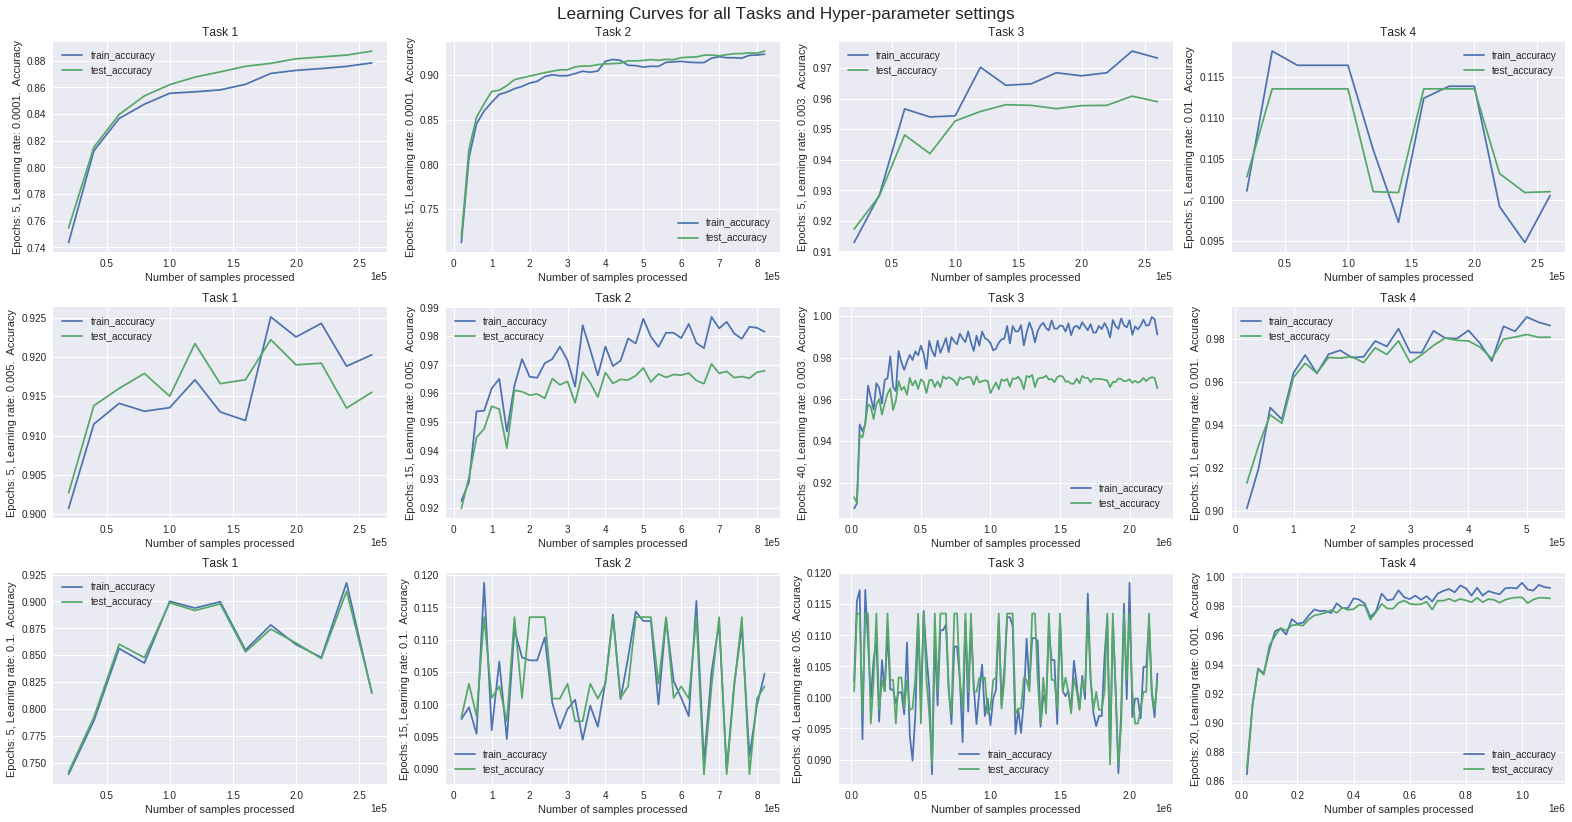

In [0]:
plot_learning_curves([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

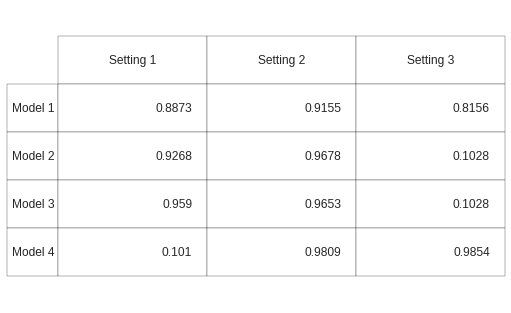

In [0]:
plot_summary_table([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

# Questions

###Q1 (32 pts): Compute the following derivatives 
Show all intermediate steps in the derivation (in markdown below). Provide the final results in vector/matrix/tensor form whenever appropiate.

1. [5 pts] Give the cross-entropy loss above, compute the derivative of the loss function with respect to the scores $z$ (the input to the softmax layer). 
$$\frac{\partial loss}{\partial z} = ?$$

P is the true value:

$$loss = -\sum_{j}^C p_{j}logy_{j}$$

$$ y=\frac{\exp(z_{i})}{\sum_{c=1}^{10} \exp(z_{i})}$$

$$if\qquad i=j: \frac{\partial yi}{\partial zi} = yi \cdot(1-yi)$$
$$ if\qquad i \ne j: \frac{\partial yi}{\partial zi} = -yi \cdot yj $$
 
$$\frac{\partial loss}{\partial zi} = -\sum_{j}^C \frac{\partial p_{j}logy_{j}}{\partial zi}
~~=~~
-\sum_{j}^C p_{j}\frac{\partial logy_{j}}{\partial y_{j}}\cdot \frac{\partial y_{j}}{\partial z_{i} }
~~=~~
- \sum_{j}^C \frac{p_{j}}{y_{j}} \frac{\partial y_{j}}{\partial zi}
~~=~~-\frac{p_{i}}{y_{i}} yi \cdot(1-yi)-\sum_{j \ne i}^C \frac{p_{j}}{y_{j}} (-yi \cdot yj)
~~=~~-p_{i}+\sum_{j }^C pj \cdot yi =yi-pi$$

Hence, 
$$\frac{\partial loss}{\partial z} = Y-P$$

2. [12 pts] Consider the first model (M1: linear + softmax). Compute the derivative of the loss with respect to
  * the input $x$
  $$\frac{\partial loss}{\partial x} = ?$$
  
  $$Z=XW+b$$
  
  $$y=softmax(z)$$
  
  $$\frac{\partial loss}{\partial x} = \frac{\partial loss}{\partial z} \cdot \frac{\partial z}{\partial x} = (Y-Y\_ ) \cdot W^{T} $$
  
  
  * the parameters of the linear layer: weights $W$ and bias $b$
  $$\frac{\partial loss}{\partial W} = ?$$
  
  $$\frac{\partial loss}{\partial x} = \frac{\partial loss}{\partial z} \cdot \frac{\partial z}{\partial w} =  X^{T} \cdot (Y-Y\_ ) $$
  
  
  $$\frac{\partial loss}{\partial b} = ?$$
  
  $$\frac{\partial loss}{\partial b} = \frac{\partial loss}{\partial z} \cdot \frac{\partial z}{\partial b} =  \sum_{j }^N (yi-yi\_)$$
  
3. [15 pts] Compute the derivative of a convolution layer wrt. to its parameters W and wrt. to its input (4-dim tensor). Assume a filter of size H x W x D, and stride 1.
  $$\frac{\partial loss}{\partial W} = ?$$
  
  $$z1=a1=conv1(x_input,w1,b1)$$
  
  $$z2=a2=maxpooling(a1)$$
  
  $$z3=a3=conv3(a3,w2,b2)$$
  
  $$z4=a4=maxpooling(a3)$$
  
  $$a4=reshape(a4)$$
  
  $$z5=a4*W3+b3$$
  
  $$a5=relu(z5)$$
  
  $$z6=a6*w4+b4$$
  
  $$y=softmax(z6)$$
  
  $$\frac{\partial loss}{\partial z6} = y-y\_ $$
  
  $$\frac{\partial loss}{\partial w4} = \frac{\partial loss}{\partial z6} \cdot \frac{\partial z6}{\partial w4} =np.dot(a6^{T},(y-y\_)) $$
  
  $$\frac{\partial loss}{\partial z5} = \frac{\partial loss}{\partial z6} \cdot \frac{\partial z6}{\partial a5} \cdot \frac{\partial a5}{\partial z5} 
  ~~=~~ \frac{\partial loss}{\partial z6} \cdot w4^{T} \cdot relu(z5)' = np.dot((y-y\_),w4^{T}) *relu(z5)'$$
  
  $$\frac{\partial loss}{\partial w3} = \frac{\partial loss}{\partial z5} \cdot \frac{\partial z5}{\partial w3} 
  ~~=~~ \frac{\partial loss}{\partial z5} \cdot a4_{T} =np.dot(a4_{T},\frac{\partial loss}{\partial z5})$$
  
  $$\frac{\partial loss}{\partial z4} = \frac{\partial loss}{\partial z6} \cdot \frac{\partial z6}{\partial a5} \cdot \frac{\partial a5}{\partial z5} 
  ~~=~~ \frac{\partial loss}{\partial z6} \cdot w4^{T} \cdot relu(z5)' = np.dot((y-y\_),w4^{T}) *relu(z5)'$$
  
  $$\frac{\partial loss}{\partial z4} = reshape(\frac{\partial loss}{\partial z4})$$
  
  $$\frac{\partial loss}{\partial z3} = upsampling(\frac{\partial loss}{\partial z4}) $$
  upsampling: Each element in z4 is the corresponding maximum value among 2x2 values. Transform x into y by replacing the positions of maximum value with $$\frac{\partial loss}{\partial z4}$$ and the rest positions with 0.
  
  $$\frac{\partial loss}{\partial w2} = \frac{\partial loss}{\partial z3} \cdot \frac{\partial z3}{\partial w2}
  ~~=~~conv(a2,\frac{\partial loss}{\partial z3})$$
  
  $$kernel = \frac{\partial loss}{\partial z3}$$
  
  $$\frac{\partial loss}{\partial z2}=\frac{\partial loss}{\partial z3} \cdot \frac{\partial z3}{\partial z2}
  ~~=~~conv(\frac{\partial loss}{\partial z3},rot180(w2))$$
  
  $$\frac{\partial loss}{\partial z1} = upsampling(\frac{\partial loss}{\partial z2}) $$
  
  $$\frac{\partial loss}{\partial w1} = \frac{\partial loss}{\partial z1} \cdot \frac{\partial z1}{\partial w1}
  ~~=~~conv(a1,\frac{\partial loss}{\partial z1})$$
  
  $$\frac{\partial loss}{\partial input\_x}=\frac{\partial loss}{\partial z1} \cdot \frac{\partial z1}{\partial input\_x}
  ~~=~~conv(\frac{\partial loss}{\partial z1},rot180(w1))$$
  
  
 
  


### A1: (Your answer here)

### Q2 (8 pts): How do the results compare to the ones you got when implementing these models in TensorFlow? 
1. [4 pts] For each of the models, please comment on any differences or discrepancies in results -- runtime, performance and stability in training and final performance. (This would be the place to justify design decisions in the implementation and their effects).
2. [2 pts] Which of the models show under-fitting?
3. [2 pts] Which of the models show over-fitting?

### A2: (Your answer here)

In [0]:
1+1

2